# Proyek sistem rekomendasi film

- **Nama:** Naufal Dzakwan Zakianto
- **Email:** naufal.dzakwann28@gmail.com
- **ID Dicoding:** MC012D5Y2416

# Project overview

Saat ini industri film sudah berkembang sangat cepat, jika dahulu para penikmat film diharuskan untuk datang ke bioskop atau membeli vcd untuk dapat menikmati film, kini industri film sudah mengalami digitalisasi. Perusahaan besar yang menyediakan tempat atau platform untuk menikmati film mulai bermunculan, seperti Netflix, Youtube, maupun Amazon. Perkembangan yang pesat tentunya juga mengakibatkan bertambahnya produksi film secara masif setiap tahunnya, sehingga pengguna mengalami kesulitan dalam menemukan film yang sesuai dengan preferensi mereka. Untuk mengatasi permasalahan tersebut, banyak perusahaan menggunakan sistem rekomendasi agar mereka dapat melayani pengguna dengan lebih baik dan meningkatkan keuntungan mereka (Sunilkumar, 2020). Hal ini karena sistem rekomendasi dapat membantu menyaring ribuan opsi dan menyajikan film yang sesuai dengan selera pengguna. Sejalan dengan kebutuhan tersebut, proyek ini bertujuan untuk mengembangkan sistem rekomendasi menggunakan dua pendekatan utama, yaitu content-based filtering dan collaborative filtering.

# Business understanding

**Problem Statements**

1. Bagaimana cara memberikan rekomendasi film yang relevan kepada pengguna berdasarkan preferensi mereka?

2. Bagaimana memanfaatkan data rating pengguna dan data film untuk menghasilkan rekomendasi yang akurat?

**Goals**
1. Membangun sistem rekomendasi yang dapat memberikan daftar 10 film terbaik untuk pengguna.

2. Mengimplementasikan dua pendekatan berbeda: content-based filtering dan collaborative filtering.

**Solution Approach**
1. Content-Based Filtering: Menggunakan metadata film (genre) untuk merekomendasikan film yang mirip dengan yang disukai pengguna.

2. Collaborative Filtering: Menggunakan data rating dari pengguna lain untuk merekomendasikan film yang mungkin disukai oleh pengguna serupa.



# Import library

In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
path = kagglehub.dataset_download("nicoletacilibiu/movies-and-ratings-for-recommendation-system")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/movies-and-ratings-for-recommendation-system


In [3]:
movies = pd.read_csv(path + "/movies.csv")
ratings = pd.read_csv(path + "/ratings.csv")

# Data understanding

Data yang digunakan adalah data movies and ratings, data ini berasal dari kaggle yang dapat di akses melalui: https://www.kaggle.com/datasets/nicoletacilibiu/movies-and-ratings-for-recommendation-system

Data tersebut memiliki 2 buah dataset yaitu movies.csv dan ratings.csv

movies.csv memiliki 9742 baris data dan 3 kolom dengan rincian sebagai berikut:

- movieid: id unique masing-masing film yang ada
- tittle: judul film
- genre: genre yang dimiliki oleh masing-masing film (satu film dapat memiliki lebih dari satu genre)

Sedangkan ratings.csv  memiliki 101000 baris data dan 4 kolom dengan rincian sebagai berikut:

- userid: id unique masing masing user yang ada
- movieid: id unique masing-masing film yang ada
- rating: nilai yang diberikan user terhadap suatu film
- timestamp: waktu dan tanggal pada saat user memberikan penilaian terhadap suatu film



# Exploratory data analysis

## Dataset movies.csv

Melihat bentuk dataset movies

In [4]:
movies.shape

(9742, 3)

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Memeriksa deskripsi variabel movies

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [7]:
movies.describe(include = 'all')

,movieId,title,genres
count,9742.000000,9742,9742
unique,NaN,9737,951
top,NaN,Emma (1996),Drama
freq,NaN,2,1053
mean,42200.353623,NaN,NaN
std,52160.494854,NaN,NaN
min,1.000000,NaN,NaN
25%,3248.250000,NaN,NaN
50%,7300.000000,NaN,NaN
75%,76232.000000,NaN,NaN


Melakukan cek null values dataset movies

In [8]:
movies.isnull().sum()

,0
movieId,0
title,0
genres,0


Melakukan cek duplikasi dataset movies

In [9]:
movies.duplicated().sum()

np.int64(0)

INSIGHT:

- Terdapat tahun rilis movie yang dapat dipisahkan menjadi kolom terpisah dengan tittle
- Tidak ditemukan missing value
- Tidak ditemukan duplikasi data
- Tidak ditemukan inaccurate value

## Dataset ratings

Melihat bentuk data ratings

In [10]:
ratings.shape

(100836, 4)

In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Memeriksa deskripsi variabel ratings

In [12]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Memeriksa missing value

In [14]:
ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


Memeriksa duplikasi data

In [15]:
ratings.duplicated().sum()

np.int64(0)

INSIGHT:
- Tidak ditemukan missing value
- Tidak ditemukan duplikasi data
- Terdapat ketidaksesuaian tipe data pada kolom timestamp (int64) seharusnya bertipe datetime sebab merupakan waktu kapan rating diberikan.

### Melakukan cek distribusi rating

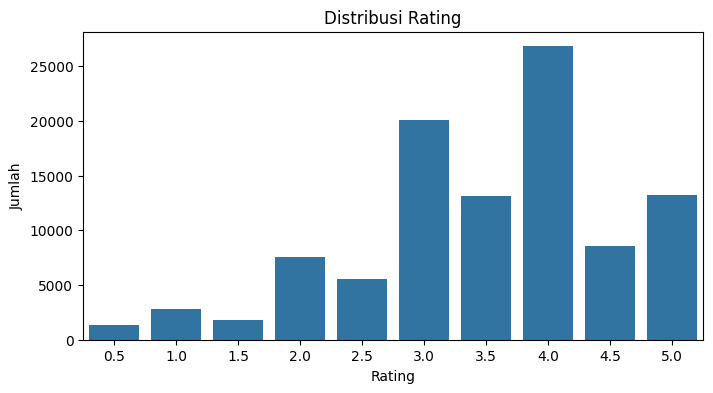

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=ratings)
plt.title("Distribusi Rating")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.show()

INSIGHT:
- Distribusi rating tidak berdistribusi normal, rating yang paling banyak diberikan adalah 4.0 dan yang paling sedikit diberikan adalah 0.5

### Analisis user

Memeriksa ada berapa jumlah user yang ada

In [21]:
print("Jumlah user unik:", ratings['userId'].nunique())

Jumlah user unik: 610


Memeriksa user mana yang paling aktif

In [19]:
top_users = ratings['userId'].value_counts().head(10)
print("Top 10 pengguna paling aktif:\n", top_users)

Top 10 pengguna paling aktif:
 userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
Name: count, dtype: int64


Memeriksa distribusi jumlah film yang ditonton per user

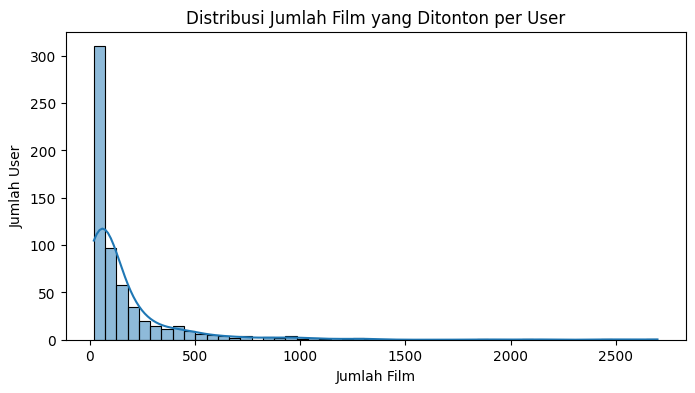

In [22]:
user_activity = ratings['userId'].value_counts()
plt.figure(figsize=(8, 4))
sns.histplot(user_activity, bins=50, kde=True)
plt.title("Distribusi Jumlah Film yang Ditonton per User")
plt.xlabel("Jumlah Film")
plt.ylabel("Jumlah User")
plt.show()

INSIGHT:
- User yang ada berjumlah 610 user
- User yang paling aktif jika dilihat berdasarkan rating yang diberikan adalah user dengan userId 414
- Jumlah film yang ditonton tiap user cenderung dibawah 500 film, sangat sedikit user yang sudah menonton lebih dari 500 film

## Dataset movies dan ratings

### Analysis genre

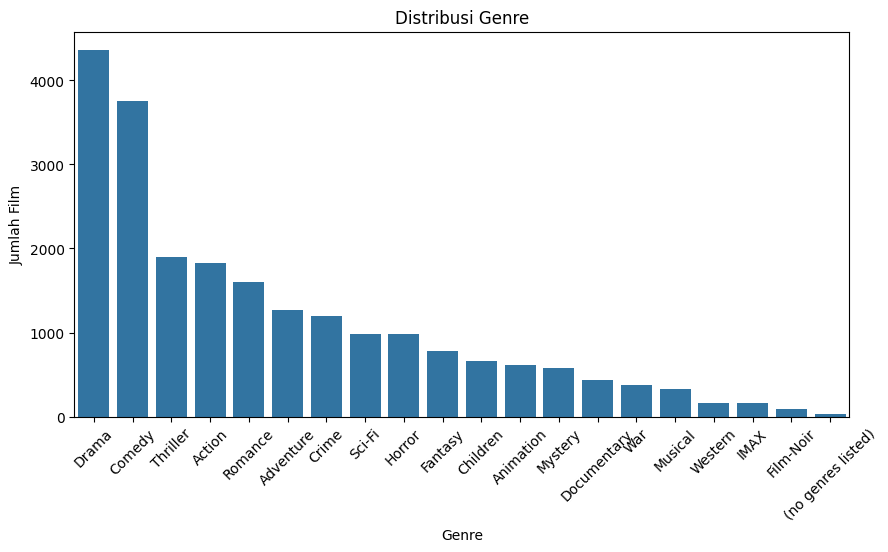

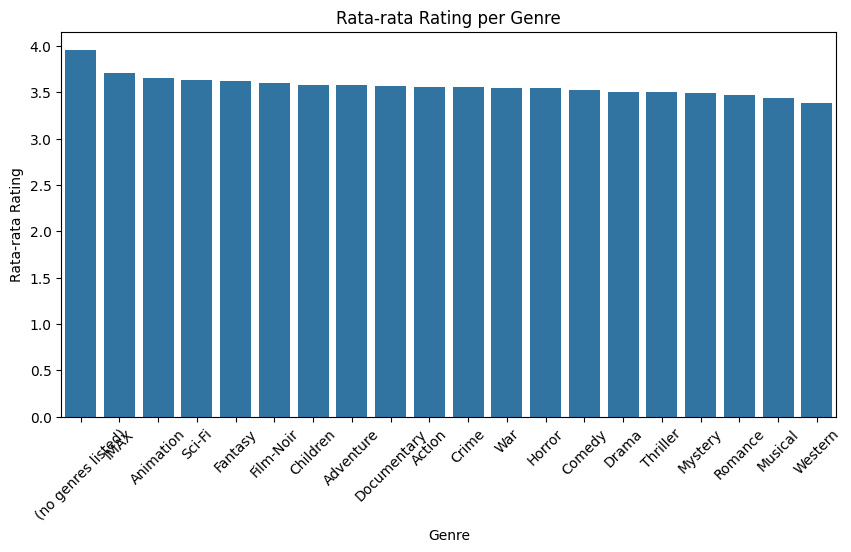

In [6]:
genres_expanded = movies['genres'].str.get_dummies(sep='|')
genre_counts = genres_expanded.sum().sort_values(ascending=False)


plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45)
plt.title("Distribusi Genre")
plt.xlabel("Genre")
plt.ylabel("Jumlah Film")
plt.show()


ratings_movies_genres = ratings.merge(movies, on='movieId')
ratings_movies_genres = ratings_movies_genres.join(genres_expanded)


genre_ratings = {}
for genre in genres_expanded.columns:
    genre_ratings[genre] = ratings_movies_genres[ratings_movies_genres[genre] == 1]['rating'].mean()

genre_ratings = pd.Series(genre_ratings).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=genre_ratings.index, y=genre_ratings.values)
plt.xticks(rotation=45)
plt.title("Rata-rata Rating per Genre")
plt.xlabel("Genre")
plt.ylabel("Rata-rata Rating")
plt.show()

In [ ]:
no_genre_movies = movies[movies['genres'] == '(no genres listed)']
print(no_genre_movies)

      movieId                                              title  \
8517   114335                                  La cravate (1957)   
8684   122888                                     Ben-hur (2016)   
8687   122896  Pirates of the Caribbean: Dead Men Tell No Tal...   
8782   129250                                  Superfast! (2015)   
8836   132084                                Let It Be Me (1995)   
8902   134861               Trevor Noah: African American (2013)   
9033   141131                                   Guardians (2016)   
9053   141866                                  Green Room (2015)   
9070   142456                     The Brand New Testament (2015)   
9091   143410                                         Hyena Road   
9138   147250  The Adventures of Sherlock Holmes and Doctor W...   
9178   149330                          A Cosmic Christmas (1977)   
9217   152037                                 Grease Live (2016)   
9248   155589                             Noin 7

In [ ]:
jumlah_tanpa_genre = (movies['genres'] == '(no genres listed)').sum()
print("Jumlah film tanpa genre:", jumlah_tanpa_genre)

Jumlah film tanpa genre: 34


In [ ]:
persentase = 100 * jumlah_tanpa_genre / len(movies)
print(f"Persentase film tanpa genre: {persentase:.2f}%")

Persentase film tanpa genre: 0.35%


INSIGHT:

Ternyata setelah di cek, ada film yang tidak memiliki genre. dan berhubung film yang tidak memiliki genre hanyalah sedikit yaitu 0.35% maka dapat dihapus nantinya pada proses preprocessing data

Menghapus movie yang tidak memiliki genre

In [8]:
moviesplot = movies[movies['genres'] != '(no genres listed)']

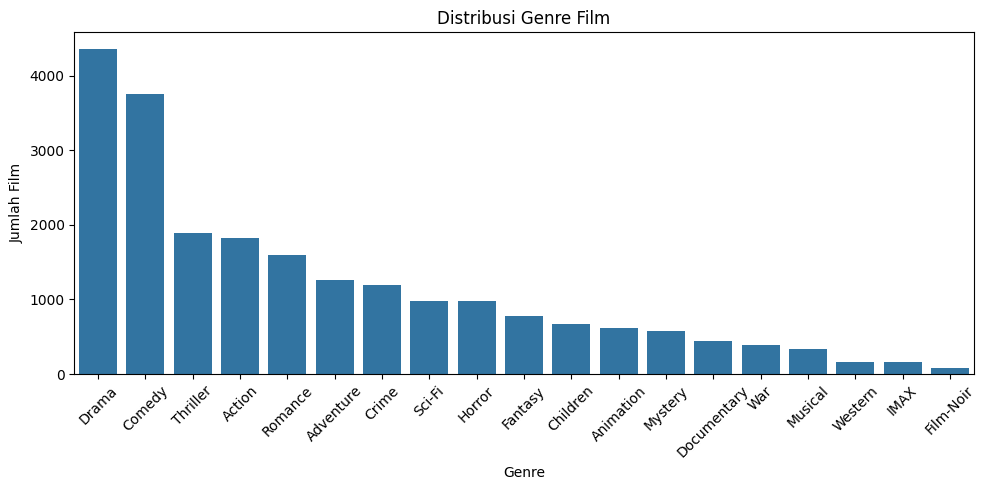

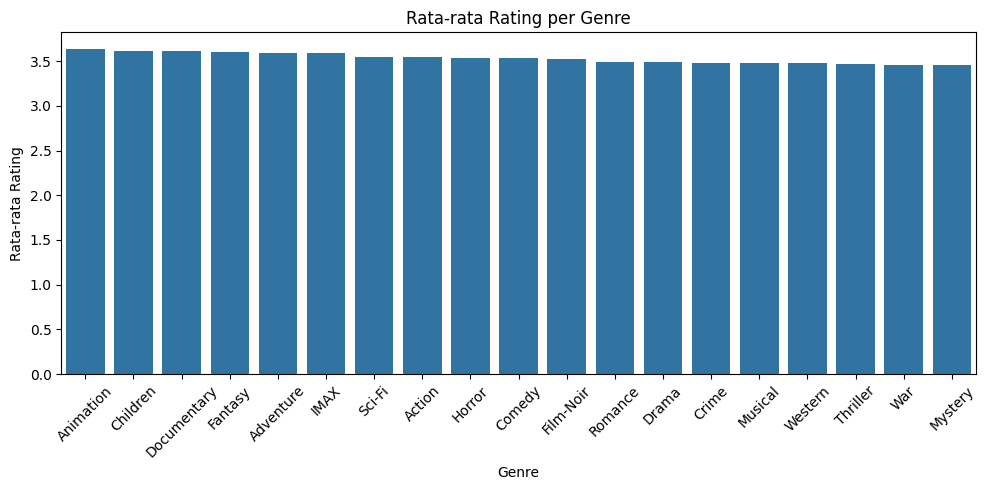

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



genres_expanded = moviesplot['genres'].str.get_dummies(sep='|')
genre_counts = genres_expanded.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45)
plt.title("Distribusi Genre Film")
plt.ylabel("Jumlah Film")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


ratings_movies = ratings.merge(moviesplot, on='movieId')
ratings_movies_genres = ratings_movies.join(genres_expanded)


genre_ratings = {}
for genre in genres_expanded.columns:
    avg = ratings_movies_genres[ratings_movies_genres[genre] == 1]['rating'].mean()
    genre_ratings[genre] = avg


genre_ratings = pd.Series(genre_ratings).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=genre_ratings.index, y=genre_ratings.values)
plt.xticks(rotation=45)
plt.title("Rata-rata Rating per Genre")
plt.ylabel("Rata-rata Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


INSIGHT:

Film yang ada didominasi oleh film dengan genre drama dan commedy, sedangkan film yang paling sedikit adalah film dengan genre film-noir. Dari segi rating, rata rata rating setiap genre yang terlihat tidak berbeda jauh, yakni sekitar 3.4 sampai 3.6, dengan film bergenre animation yang memiliki rata rata rating tertinggi.

### Melihat tren jumlah rating per tahun

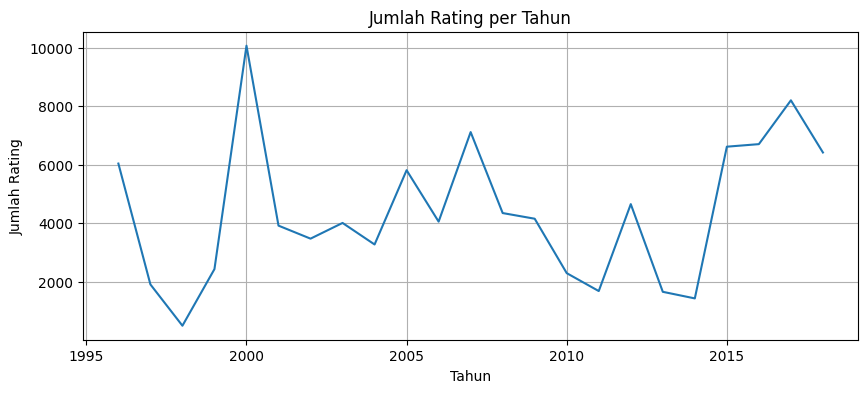

In [10]:
ratingsPlot = ratings
ratingsPlot['timestamp'] = pd.to_datetime(ratingsPlot['timestamp'], unit='s')
ratingsPlot['year'] = ratingsPlot['timestamp'].dt.year

ratings_per_year = ratingsPlot.groupby('year').size()

plt.figure(figsize=(10, 4))
ratings_per_year.plot()
plt.title("Jumlah Rating per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Rating")
plt.grid()
plt.show()

INSIGHT:

Tahun 2000 adalah tahun dengan puncak pemberian rating paling tinggi jika didasarkan pada jumlah rating yang diberikan oleh user, hal ini juga berarti bahwa pada tahun inilah puncak terbanyak film yang ditonton oleh user. Meskpun trend sempat mengalami penurunan setelahnya pada tahun 2001 sampai dengan 2014, jumah rating yang diberikan kembali mengalami kenaikan meskipun tidak setinggi tahun 2000.

# Content based filtering

## data preprocessing & preparation

menyimpan data utama ke variabel baru khusus content based filtering

In [49]:
cbf_df = movies

In [51]:
cbf_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
cbf_df.shape

(9742, 3)

menghapus film yang tidak memiliki genre

In [54]:
cbf_df = cbf_df[cbf_df['genres'] != '(no genres listed)']

In [55]:
cbf_df.shape

(9708, 3)

## Modeling and Result

menerapkan TF-IDF Vectorizer

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(cbf_df['genres'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'horror', 'imax',
       'musical', 'mystery', 'noir', 'romance', 'sci', 'thriller', 'war',
       'western'], dtype=object)

In [57]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(cbf_df['genres'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(9708, 21)

In [58]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.4168036 , 0.51628768, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.51229321, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.5784593 , 0.        , 0.81571125, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [60]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis genre
# Baris diisi dengan nama film

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=cbf_df.title
).sample(21, axis=1).sample(10, axis=0)

,documentary,imax,romance,sci,war,noir,drama,horror,musical,fantasy,...,crime,thriller,children,film,comedy,western,action,mystery,animation,fi
title,,,,,,,,,,,,,,,,,,,,,
Camp Rock (2008),0.0,0.0,0.505940,0.000000,0.0,0.0,0.000000,0.0,0.787642,0.000000,...,0.000000,0.000000,0.000000,0.0,0.351630,0.0,0.000000,0.0,0.0,0.000000
Larry David: Curb Your Enthusiasm (1999),0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000
Snow Falling on Cedars (1999),0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
Mean Machine (2001),0.0,0.0,0.000000,0.000000,0.0,0.0,0.678412,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.734682,0.0,0.000000,0.0,0.0,0.000000
"Pink Panther Strikes Again, The (1976)",0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.845811,0.000000,0.000000,0.0,0.533483,0.0,0.000000,0.0,0.0,0.000000
Mr. Deeds Goes to Town (1936),0.0,0.0,0.821155,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.570705,0.0,0.000000,0.0,0.0,0.000000
RoboCop 2 (1990),0.0,0.0,0.000000,0.489191,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.459249,0.391359,0.000000,0.0,0.000000,0.0,0.396627,0.0,0.0,0.489191
"NeverEnding Story II: The Next Chapter, The (1990)",0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.593677,...,0.000000,0.000000,0.620567,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
Infernal Affairs 2 (Mou gaan dou II) (2003),0.0,0.0,0.000000,0.000000,0.0,0.0,0.347366,0.0,0.000000,0.000000,...,0.596413,0.508246,0.000000,0.0,0.000000,0.0,0.515087,0.0,0.0,0.000000


Menghitung derajat kesamaan dengan cosine similarity

In [62]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.8136036 , 0.15259961, ..., 0.        , 0.42114166,
        0.26738778],
       [0.8136036 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15259961, 0.        , 1.        , ..., 0.        , 0.        ,
        0.57070525],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.42114166, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26738778, 0.        , 0.57070525, ..., 0.        , 0.        ,
        1.        ]])

In [63]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa namafilm
cosine_sim_df = pd.DataFrame(cosine_sim, index=cbf_df['title'], columns=cbf_df['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap film
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9708, 9708)


title,Straight Outta Compton (2015),One-Way Ticket to Mombasa (Menolippu Mombasaan) (2002),It's Such a Beautiful Day (2012),"Tall Man, The (2012)",It Came from Outer Space (1953)
title,,,,,
Are We There Yet? (2005),0.000000,0.343839,0.122701,0.000000,0.0
Ricky Gervais Live: Animals (2003),0.000000,0.734682,0.262177,0.000000,0.0
Ari Shaffir: Double Negative (2017),0.000000,0.734682,0.262177,0.000000,0.0
Bellflower (2011),0.421572,0.285999,0.102061,0.144850,0.0
Gentlemen of Fortune (Dzhentlmeny udachi) (1972),0.322024,0.474674,0.169391,0.937222,0.0
"Chaser, The (Chugyeogja) (2008)",0.405263,0.274935,0.098113,0.549736,0.0
Sandy Wexler (2017),0.000000,0.734682,0.262177,0.000000,0.0
Sinister (2012),0.000000,0.000000,0.000000,0.000000,0.0
Everything Is Illuminated (2005),0.678412,1.000000,0.356857,0.233099,0.0


membuat fungsi movie recommendations

In [70]:
def movie_recommendations(judul_film, similarity_data=cosine_sim_df, items=cbf_df[['title', 'genres']], k=10):
    """
    Rekomendasi film berdasarkan kemiripan dataframe

    Parameter:
    ---
    judul_film : tipe data string (str)
            judul film (index kemiripan dataframe)

    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan film sebagai
                      indeks dan kolom

    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan

    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,judul_film].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(judul_film, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

mendapatkan rekomendasi

In [68]:
cbf_df[cbf_df.title.eq('Jumanji (1995)')]

,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [71]:
movie_recommendations('Jumanji (1995)')

,title,genres
0,Gulliver's Travels (1996),Adventure|Children|Fantasy
1,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy
2,Escape to Witch Mountain (1975),Adventure|Children|Fantasy
3,Alice Through the Looking Glass (2016),Adventure|Children|Fantasy
4,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy
5,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy
6,"Water Horse: Legend of the Deep, The (2007)",Adventure|Children|Fantasy
7,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy
8,"NeverEnding Story II: The Next Chapter, The (1...",Adventure|Children|Fantasy
9,"Chronicles of Narnia: Prince Caspian, The (2008)",Adventure|Children|Fantasy


## Evaluation

Matrik evaluasi yang digunakan adalah precision. Precision bekerja dengan mengukur proporsi item yang direkomendasikan yang benar-benar relevan. Rumus precision adalah:

![image](https://github.com/user-attachments/assets/3fdf7a08-a69f-46e9-9b1c-1b3d123d3d91)

dengan mengikuti rumus tersebut, maka dapat menghitung precision dari content based filtering yang sudah berhasil dibangun. Yakni ada 10 item yang relevant dari 10 rekomendasi yang diberikan. Artinya nilai precision dari model tersebut adalah 100%.

# Collaborative filtering

## Data preprocessing & preparation

Menggabungkan dataset movies dan ratings menjadi satu

In [11]:
all_df = movies.merge(ratings, on='movieId')

In [12]:
all_df.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,2000
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08 06:36:02,1996
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,2005-01-25 06:52:26,2005
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,2017-11-13 12:59:30,2017
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,2011-05-18 05:28:03,2011


In [13]:
all_df.shape

(100836, 7)

Menghapus movie yang tidak memiliki genre

In [14]:
all_df = all_df[all_df['genres'] != '(no genres listed)']

In [15]:
all_df.shape

(100789, 7)

Encoding userId

In [16]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = all_df['userId'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka  ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 5, 7, 15, 17, 18, 19, 21, 27, 31, 32, 33, 40, 43, 44, 45, 46, 50, 54, 57, 63, 64, 66, 68, 71, 73, 76, 78, 82, 86, 89, 90, 91, 93, 96, 98, 103, 107, 112, 119, 121, 124, 130, 132, 134, 135, 137, 140, 141, 144, 145, 151, 153, 155, 156, 159, 160, 161, 166, 167, 169, 171, 177, 178, 179, 182, 185, 186, 191, 193, 200, 201, 202, 206, 213, 214, 216, 217, 219, 220, 223, 226, 229, 232, 233, 234, 239, 240, 247, 249, 252, 254, 263, 264, 266, 269, 270, 273, 274, 275, 276, 277, 279, 280, 282, 283, 288, 290, 291, 292, 293, 298, 304, 307, 314, 322, 323, 328, 330, 332, 334, 336, 337, 339, 341, 347, 350, 353, 357, 359, 364, 367, 372, 373, 378, 380, 381, 382, 385, 389, 391, 396, 399, 401, 411, 412, 414, 420, 422, 432, 434, 436, 438, 443, 448, 451, 453, 456, 460, 462, 468, 469, 470, 471, 474, 476, 477, 480, 483, 484, 488, 490, 492, 500, 504, 509, 514, 517, 522, 524, 525, 528, 529, 533, 534, 541, 544, 550, 555, 559, 560, 561, 562, 567, 570, 572, 573, 579, 580, 584, 587, 590, 596, 597, 599,

Encoding movieId

In [18]:
# Mengubah movieID menjadi list tanpa nilai yang sama
movie_ids = all_df['movieId'].unique().tolist()
print('list movieID: ', movie_ids)

# Melakukan proses encoding movieUd
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
print('encoded movieID :' , movie_to_movie_encoded)

# Melakukan proses encoding angka ke movieID
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
print('encoded angka ke movieID ', movie_encoded_to_movie)


list movieID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 116, 117, 118, 119, 121, 122, 123, 125, 126, 128, 129, 132, 135, 137, 140, 141, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 246, 247, 248, 249, 250, 251, 2

Mapping user id dan movie id ke dataframe yang berkaitan

In [19]:
# Mapping userID ke dataframe user
all_df['user'] = all_df['userId'].map(user_to_user_encoded)

# Mapping movieID ke dataframe movie
all_df['movie'] = all_df['movieId'].map(movie_to_movie_encoded)

In [20]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah film
num_movie = len(movie_encoded_to_movie)
print(num_movie)

# Nilai minimum rating
min_rating = min(all_df['rating'])

# Nilai maksimal rating
max_rating = max(all_df['rating'])

print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9690
Number of User: 610, Number of movie: 9690, Min Rating: 0.5, Max Rating: 5.0


Membagi data training dan validasi

In [21]:
# Mengacak dataset
all_df = all_df.sample(frac=1, random_state=42)
all_df

,movieId,title,genres,userId,rating,timestamp,year,user,movie
980,17,Sense and Sensibility (1995),Drama|Romance,227,3.5,2015-11-11 02:46:44,2015,368,16
64461,4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller,325,5.0,2002-12-09 02:06:04,2002,296,3603
80514,34532,"Skeleton Key, The (2005)",Drama|Horror|Mystery|Thriller,610,3.5,2017-05-03 22:06:10,2017,214,5945
50569,2997,Being John Malkovich (1999),Comedy|Drama|Fantasy,608,2.0,2005-05-31 01:30:35,2005,212,2257
64532,4963,Ocean's Eleven (2001),Crime|Thriller,239,4.0,2008-09-11 18:58:48,2008,86,3609
...,...,...,...,...,...,...,...,...,...
6265,231,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy,353,4.0,1996-05-12 22:21:25,1996,127,197
54886,3499,Misery (1990),Drama|Horror|Thriller,599,2.5,2017-06-26 22:15:36,2017,204,2610
76820,8670,"Testament of Dr. Mabuse, The (Das Testament de...",Crime|Horror|Mystery|Thriller,387,4.0,2007-05-15 03:33:05,2007,336,5262
860,15,Cutthroat Island (1995),Action|Adventure|Romance,6,4.0,1996-10-17 12:15:05,1996,215,14


In [22]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = all_df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = all_df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * all_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 368   16]
 [ 296 3603]
 [ 214 5945]
 ...
 [ 336 5262]
 [ 215   14]
 [ 298  507]] [0.66666667 1.         0.66666667 ... 0.77777778 0.77777778 0.55555556]


## Modeling and Result

membuat class RecommenderNet dengan keras Model class

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.movie_embedding = layers.Embedding(
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

compile model

In [24]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Memulai training

In [25]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 108s 11ms/step - loss: 0.6460 - root_mean_squared_error: 0.2415 - val_loss: 0.6106 - val_root_mean_squared_error: 0.2033
Epoch 2/10
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 101s 10ms/step - loss: 0.6077 - root_mean_squared_error: 0.1992 - val_loss: 0.6068 - val_root_mean_squared_error: 0.1990
Epoch 3/10
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 138s 10ms/step - loss: 0.6005 - root_mean_squared_error: 0.1936 - val_loss: 0.6054 - val_root_mean_squared_error: 0.1973
Epoch 4/10
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 139s 9ms/step - loss: 0.5979 - root_mean_squared_error: 0.1900 - val_loss: 0.6045 - val_root_mean_squared_error: 0.1960
Epoch 5/10
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 146s 10ms/step - loss: 0.5958 - root_mean_squared_error: 0.1882 - val_loss: 0.6042 - val_root_mean_squared_error: 0.1956
Epoch 6/10
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 147s 10ms/step - loss: 0.5946 - root_mean_squared_error: 0.1870 - val_loss: 0.6040 - val_root_mean_squared_error: 0.1952
Epoch 7/10


Mendapatkan rekomendasi film

In [26]:
import numpy as np

movie_df = movies

# Mengambil sample user
user_id = 325
movie_watch_by_user = all_df[all_df.userId == user_id]

movie_not_visited = movie_df[~movie_df['movieId'].isin(movie_watch_by_user.movieId.values)]['movieId']
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

In [27]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watch_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['movieId'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genres)

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['movieId'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genres)

295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Showing recommendations for users: 325
Movie with high ratings from user
--------------------------------
Shawshank Redemption, The (1994) : Crime|Drama
African Queen, The (1951) : Adventure|Comedy|Romance|War
Platoon (1986) : Drama|War
Harvey (1950) : Comedy|Fantasy
Stunt Man, The (1980) : Action|Adventure|Comedy|Drama|Romance|Thriller
--------------------------------
Top 10 movie recommendation
--------------------------------
Philadelphia Story, The (1940) : Comedy|Drama|Romance
Singin' in the Rain (1952) : Comedy|Musical|Romance
It Happened One Night (1934) : Comedy|Romance
North by Northwest (1959) : Action|Adventure|Mystery|Romance|Thriller
Some Like It Hot (1959) : Comedy|Crime
Casablanca (1942) : Drama|Romance
Maltese Falcon, The (1941) : Film-Noir|Mystery
My Fair Lady (1964) : Comedy|Drama|Musical|Romance
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) : Drama|Film-Noir|Romance
Lawrence of Arabia (1962) : Adventure|Drama|War


Berdasarkan rekomendasi film yang diberikan oleh model, dapat dilihat hasil rekomendasinya cukup baik dan sesuai dengan preferensi user id 325. Hal ini terbukti melalui genre movie yang direkomendasikan konsisten selalu memiliki keterkaitan dengan genre movie yang mendapatkan rating tinggi oleh user.

## Evaluasi

Visualisasi metrik

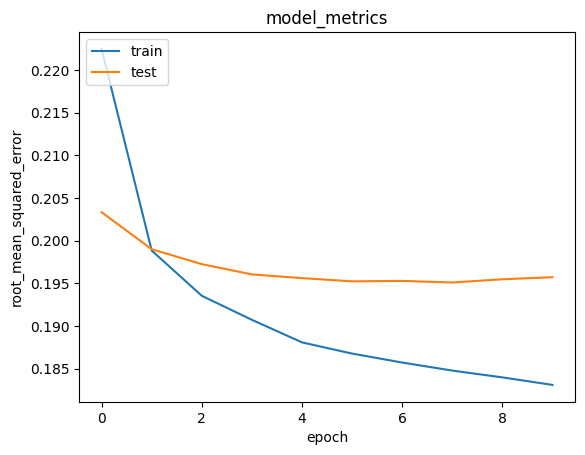

In [28]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

berdasarkan visualisasi di atas, dapat diketahui bahwa proses training model cukup smooth dan model konvergen pada epochs sekitar 10. Dari proses ini, diperoleh nilai error akhir pada proses training sebesar sekitar 0.1822 dan error pada data validasi sebesar 0.1957. Nilai tersebut cukup bagus untuk sistem rekomendasi. Hal ini semakin diperkuat dengan bukti rekomendasi yang cukup relevan pada saat dilakukan uji coba mendapatkan rekomendasi film.